Group-8- Recording Link-https://drive.google.com/file/d/1o7Fwn9Zfo4zHYL0NdcYchYd0B1Rw01vM/view?usp=drive_link

Collaborators- Sahil kak, Norman Chang,Deepak Mathivanan

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
data=pd.read_csv("/content/OnlineRetail.csv", dtype={"Invoice": str, "StockCode": str}, low_memory=False, encoding='latin-1') # or 'cp1252'


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Fix 'Customer ID':
data.loc[:,'CustomerID'] = data['CustomerID'].astype(str).apply(lambda x: x.replace('.0',''))
data.loc[:,'CustomerID'] = data['CustomerID'].replace('nan', np.nan)

# Convert 'Quantity' to integers, handling non-finite values
data.loc[:,'Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce').fillna(0).astype(int)
# Convert 'UnitPrice' to float
data.loc[:,'UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce').astype(float)


data

<ipython-input-9-9b3aea12cdf1>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['17850' '17850' '17850' ... '12680' '12680' '12680']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[:,'CustomerID'] = data['CustomerID'].astype(str).apply(lambda x: x.replace('.0',''))


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [ ]:
#Returned items:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom


In [ ]:
#Bad debt:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


2.1 -Which products are the most sold ones?

In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#dropping null values
data.dropna(inplace=True)

In [ ]:
#checking for missing values
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
#Checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


After removing null value from our dataset.

Now we have 406829 rows and 8 columns in our dataset.

In [ ]:
#changing datatype
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [ ]:
df=data[data['InvoiceNo'].str.contains('C')]

Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation

In [ ]:
#checking summary
df.describe()

,Quantity,UnitPrice
count,8905.000000,8905.000000
mean,-30.859966,18.845519
std,1170.154939,444.366043
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [ ]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_df.head()

,Count,count
0,REGENCY CAKESTAND 3 TIER,181
1,Manual,175
2,POSTAGE,97
3,JAM MAKING SET WITH JARS,86
4,Discount,77


<ipython-input-21-dad349c537d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count',y='count',data=Description_df[:5], palette='spring_r');


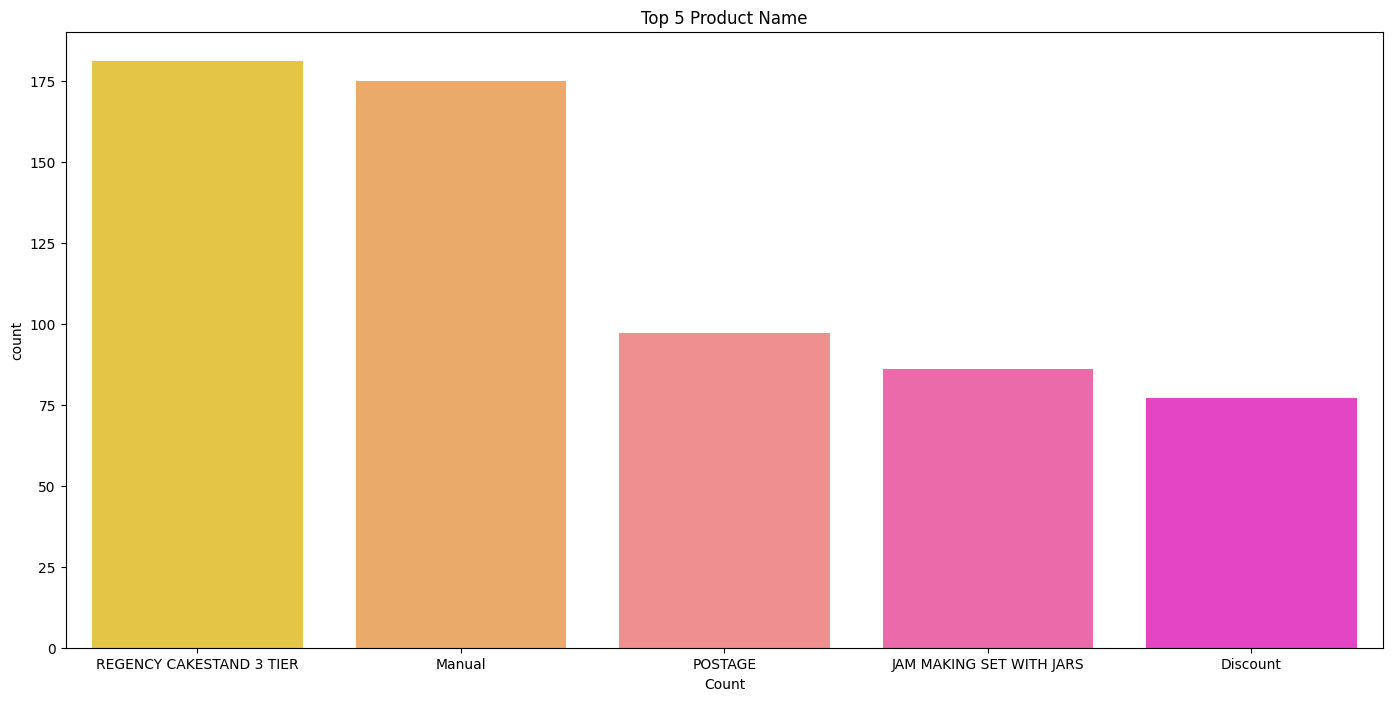

In [ ]:
#plot top 5 product name
plt.figure(figsize=(17,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Count',y='count',data=Description_df[:5], palette='spring_r');

Which countries has the most number of customers?

In [ ]:
#Total customers:
data['CustomerID'].nunique()

4372

In [ ]:
#Top 10 countries with more customers:
cust_by_country = data.groupby('Country').agg({'CustomerID': pd.Series.nunique}).sort_values(by='CustomerID', ascending=False)
cust_by_country['% Customers'] = cust_by_country['CustomerID']/data['CustomerID'].nunique()
cust_by_country['% Customers'] = cust_by_country['% Customers'].apply(lambda x: "{:.2%}".format(x))
cust_by_country.head(10)

,CustomerID,% Customers
Country,,
United Kingdom,3950,90.35%
Germany,95,2.17%
France,87,1.99%
Spain,31,0.71%
Belgium,25,0.57%
Switzerland,21,0.48%
Portugal,19,0.43%
Italy,15,0.34%
Finland,12,0.27%


In [ ]:
#Top 10 countries with more invoices:
inv_by_country = data.groupby('Country').agg({'InvoiceDate': pd.Series.nunique}).sort_values(by='InvoiceDate', ascending=False)
inv_by_country['% InvoiceDate'] = inv_by_country['InvoiceDate']/data['InvoiceDate'].nunique()
inv_by_country['% InvoiceDate'] = inv_by_country['% InvoiceDate'].apply(lambda x: "{:.2%}".format(x))
inv_by_country.head(10)

,InvoiceDate,% InvoiceDate
Country,,
United Kingdom,18441,90.13%
Germany,598,2.92%
France,458,2.24%
EIRE,318,1.55%
Belgium,119,0.58%
Spain,105,0.51%
Netherlands,101,0.49%
Portugal,70,0.34%
Switzerland,70,0.34%


In [ ]:
#Add column for Net Sale:
data.loc[:,'Net Sale $'] = data['Quantity'] * data['UnitPrice']
#data

In [ ]:
#Top 10 countries with higher Net Sales:
sales_by_country = data.groupby('Country').agg({'Net Sale $': pd.Series.sum}).sort_values(by='Net Sale $', ascending=False)
sales_by_country['% Net Sale'] = sales_by_country['Net Sale $']/data['Net Sale $'].sum()

#sales_by_country['Net Sale'] = sales_by_country['Net Sale'].apply(lambda x: "{:,.0f}".format(x))
sales_by_country['% Net Sale'] = sales_by_country['% Net Sale'].apply(lambda x: "{:.2%}".format(x))

sales_by_country.head(10)

,Net Sale $,% Net Sale
Country,,
United Kingdom,6767873.394,81.54%
Netherlands,284661.540,3.43%
EIRE,250285.220,3.02%
Germany,221698.210,2.67%
France,196712.840,2.37%
Australia,137077.270,1.65%
Switzerland,55739.400,0.67%
Spain,54774.580,0.66%
Belgium,40910.960,0.49%


In [ ]:
#Consolidated analysis by country:
sum_by_country = sales_by_country.join([cust_by_country, inv_by_country])

sum_by_country['$ per customer'] = sum_by_country['Net Sale $']/sum_by_country['CustomerID']
sum_by_country['$ per invoice'] = sum_by_country['Net Sale $']/sum_by_country['InvoiceDate']
sum_by_country['Invoices per customer'] = sum_by_country['InvoiceDate']/sum_by_country['CustomerID']

sum_by_country = sum_by_country.sort_values(by='$ per customer', ascending=False)
sum_by_country = sum_by_country[sum_by_country['CustomerID'] != 0]

sum_by_country['Net Sale $'] = sum_by_country['Net Sale $'].apply(lambda x: "{:,.0f}".format(x))
sum_by_country['CustomerID'] = sum_by_country['CustomerID'].apply(lambda x: "{:,.0f}".format(x))
sum_by_country['InvoiceDate'] = sum_by_country['InvoiceDate'].apply(lambda x: "{:,.0f}".format(x))
sum_by_country['$ per customer'] = sum_by_country['$ per customer'].apply(lambda x: "{:,.0f}".format(x))
sum_by_country['$ per invoice'] = sum_by_country['$ per invoice'].apply(lambda x: "{:,.0f}".format(x))
sum_by_country['Invoices per customer'] = sum_by_country['Invoices per customer'].apply(lambda x: "{:,.1f}".format(x))

sum_by_country.head(15)

,Net Sale $,% Net Sale,CustomerID,% Customers,InvoiceDate,% InvoiceDate,$ per customer,$ per invoice,Invoices per customer
Country,,,,,,,,,
EIRE,"250,285",3.02%,3,0.07%,318,1.55%,"83,428",787,106.0
Netherlands,"284,662",3.43%,9,0.21%,101,0.49%,"31,629","2,818",11.2
Australia,"137,077",1.65%,9,0.21%,66,0.32%,"15,231","2,077",7.3
Singapore,"9,120",0.11%,1,0.02%,10,0.05%,"9,120",912,10.0
Sweden,"36,596",0.44%,8,0.18%,45,0.22%,"4,574",813,5.6
Japan,"35,341",0.43%,8,0.18%,29,0.14%,"4,418","1,219",3.6
Iceland,"4,310",0.05%,1,0.02%,7,0.03%,"4,310",616,7.0
Norway,"35,163",0.42%,10,0.23%,40,0.20%,"3,516",879,4.0
Switzerland,"55,739",0.67%,21,0.48%,70,0.34%,"2,654",796,3.3


<ipython-input-28-5e735de5f937>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(labels[i], (x[i], y[i]), textcoords="offset points", xytext=(10,3), ha='center', fontsize=9)


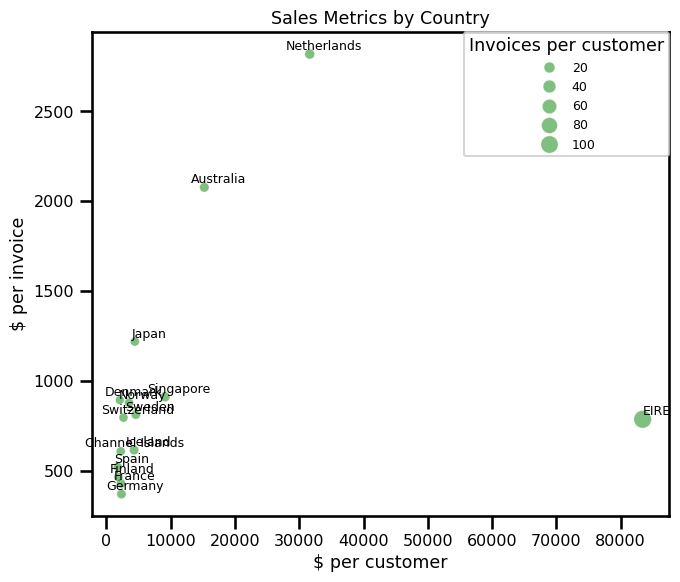

In [ ]:
plot_data = sum_by_country[['$ per customer', '$ per invoice', 'Invoices per customer']].head(15)
plot_data['$ per customer'] = sum_by_country['$ per customer'].replace({',':''}, regex=True).astype(int)
plot_data['$ per invoice'] = sum_by_country['$ per invoice'].replace({',':''}, regex=True).astype(int)
plot_data['Invoices per customer'] = sum_by_country['Invoices per customer'].astype(float)

sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(7, 6))
sns.scatterplot(x='$ per customer',
                y='$ per invoice',
                size='Invoices per customer',
                alpha=0.5,
                data=plot_data,
                color='green')

labels = plot_data.index.values.tolist()
x = plot_data['$ per customer']
y = plot_data['$ per invoice']

for i in range(len(labels)):
    plt.annotate(labels[i], (x[i], y[i]), textcoords="offset points", xytext=(10,3), ha='center', fontsize=9)

plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0, title="Invoices per customer", fontsize=9)

plt.xlabel("$ per customer")
plt.ylabel("$ per invoice")
plt.title("Sales Metrics by Country")
plt.tight_layout()

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#RFM Scores
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

#Ensure necessary columns exist and are properly formatted
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')  # Convert InvoiceDate to datetime
df['TotalSales'] = df['Quantity'] * df['UnitPrice']  # Calculate TotalSales if not already present

#Drop rows with invalid or missing dates
df = df.dropna(subset=['InvoiceDate'])

df.columns
#Define the current reference date (e.g., analysis date)
reference_date = dt.datetime(2024, 12, 2)  # Replace with the actual analysis date

#Group by Customer ID to calculate Recency, Frequency, and Monetary
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  #Recency: days since last purchase
    'InvoiceNo': 'nunique',                                     #Frequency: number of unique invoices
    'TotalSales': 'sum'                                       #Monetary: total sales amount
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSales': 'Monetary'})

#Normalize Recency, Frequency, and Monetary scores between 0 and 1
scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

#Calculate weighted RFM score (adjust weights as needed)
rfm['RFM_Score'] = (0.30 * (1 - rfm['Recency'])) + (0.30 * rfm['Frequency']) + (0.40 * rfm['Monetary'])

#Sort by RFM_Score and display the top 10 and bottom 10
top_10_scores = rfm.sort_values(by=['RFM_Score'], ascending=False).head(10)
bottom_10_scores = rfm.sort_values(by=['RFM_Score'], ascending=True).head(10)

#Display top 10 and bottom 10 RFM scores
print("Top 10 RFM Scores:")
display(top_10_scores)

print("\nBottom 10 RFM Scores:")
display(bottom_10_scores)


Top 10 RFM Scores:


<ipython-input-30-18d15d344f2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')  # Convert InvoiceDate to datetime
<ipython-input-30-18d15d344f2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSales'] = df['Quantity'] * df['UnitPrice']  # Calculate TotalSales if not already present


,Recency,Frequency,Monetary,RFM_Score
CustomerID,,,,
17841,0.042895,0.956522,0.996140,0.972544
14911,0.021448,1.000000,0.933210,0.966850
14606,0.067024,0.739130,0.997374,0.900582
14527,0.021448,0.652174,0.995269,0.887325
15311,0.000000,0.565217,0.991998,0.866364
13408,0.021448,0.391304,0.996265,0.809463
13078,0.002681,0.347826,0.998841,0.803080
12471,0.045576,0.391304,0.993573,0.801148
16422,0.209115,0.500000,0.994787,0.785180



Bottom 10 RFM Scores:


,Recency,Frequency,Monetary,RFM_Score
CustomerID,,,,
12346,0.871314,0.0,0.541856,0.255348
16446,0.000000,0.0,0.000000,0.300000
16546,0.997319,0.0,0.994761,0.398709
14213,0.994638,0.0,0.992926,0.398779
17897,1.000000,0.0,0.999851,0.399940
13958,0.997319,0.0,0.999394,0.400562
14264,0.997319,0.0,0.999916,0.400771
17547,0.997319,0.0,0.999932,0.400777
15384,0.997319,0.0,0.999963,0.400789


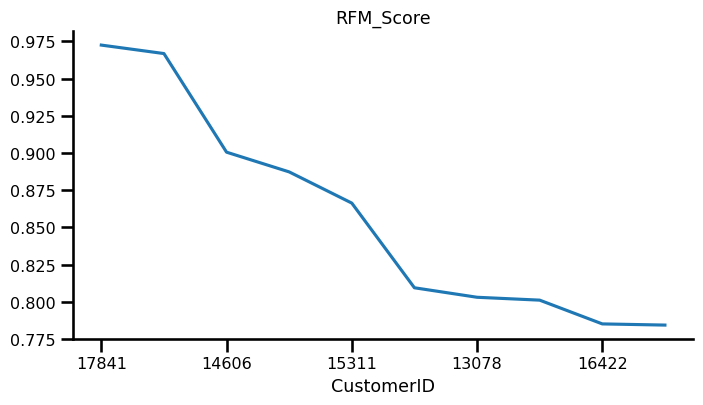

In [ ]:
# @title RFM_Score

from matplotlib import pyplot as plt
top_10_scores['RFM_Score'].plot(kind='line', figsize=(8, 4), title='RFM_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

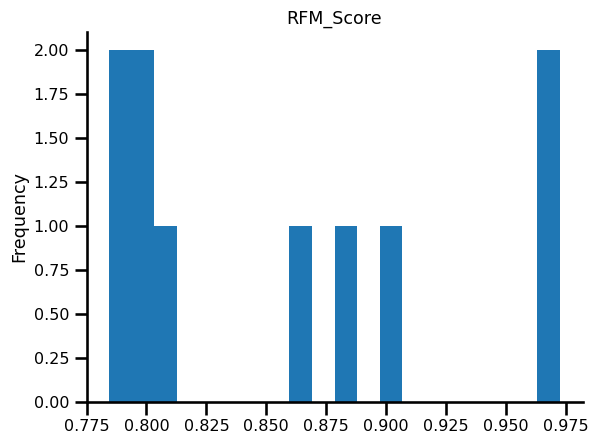

In [ ]:
# @title RFM_Score

from matplotlib import pyplot as plt
top_10_scores['RFM_Score'].plot(kind='hist', bins=20, title='RFM_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

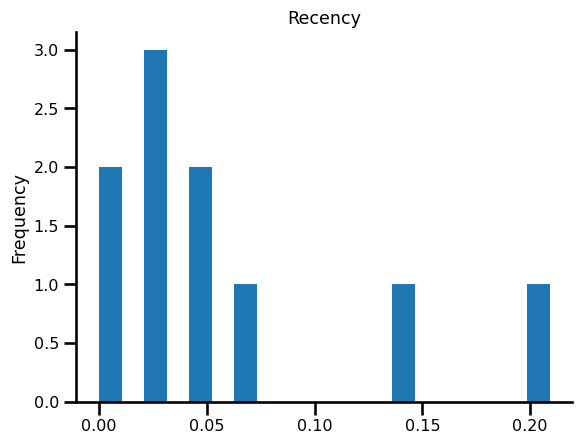

In [ ]:
# @title Recency

from matplotlib import pyplot as plt
top_10_scores['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Net Sale $'],
      dtype='object')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Net Sale $
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


#Customer Segmentation with K-Means Clustering

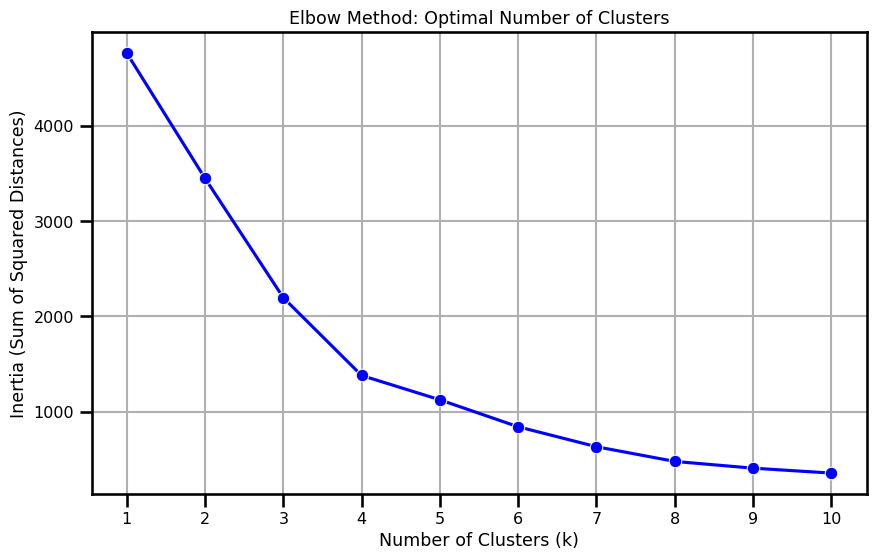

Silhouette Score for 2 clusters: 0.4870
Silhouette Score for 3 clusters: 0.4961
Silhouette Score for 4 clusters: 0.5376
Silhouette Score for 5 clusters: 0.5367
Silhouette Score for 6 clusters: 0.4759


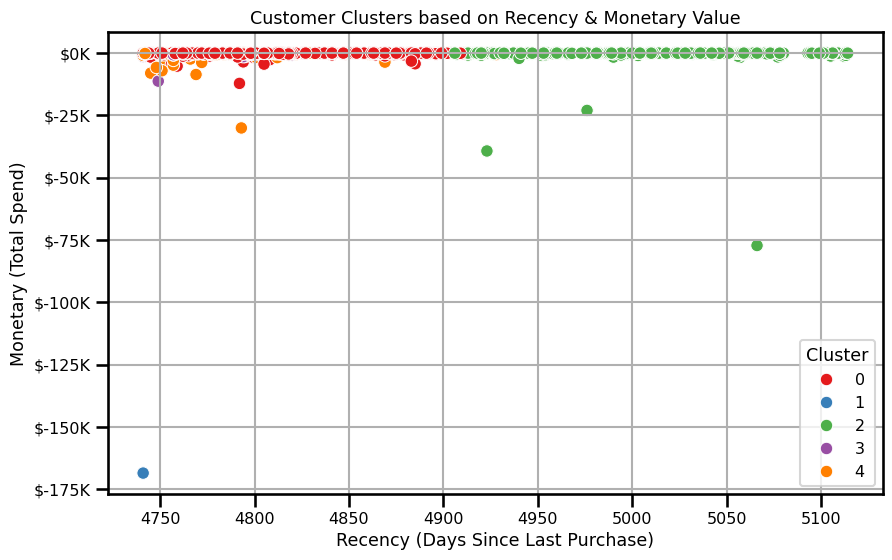

Cluster Centroids:
   Recency  Frequency  Monetary
0   4803.5        2.0    $-0.1K
1   4741.0        1.0  $-168.5K
2   5002.7        1.3    $-0.3K
3   4767.9       32.9    $-2.4K
4   4778.2        8.8    $-1.1K


In [ ]:

#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import matplotlib.ticker as mtick



#Step 2: Feature Engineering - Add Total Sales column and convert
data['Total Sales'] = data['Quantity'] * data['UnitPrice']
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year

#Step 3: Create RFM features - recency, frequency, monetary
#Group by Customer ID to calculate Recency, Frequency, and Monetary
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  #Recency: days since last purchase
    'InvoiceNo': 'nunique',                                     #Frequency: number of unique invoices
    'TotalSales': 'sum'                                       #Monetary: total sales amount
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSales': 'Monetary'})


#Step 4: Display cleaned and engineered RFM data
rfm.head()

#Step 5: Standardize RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

#Step 6: Determine optimal number of clusters via the Elbow method
inertia = [] #Sum of squared distances to nearest cluster center
k_values = range(1,11) #Testing 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

#Step 7: Plot the Elbow Method Results
plt.figure(figsize=(10,6))
sns.lineplot(x=k_values, y=inertia, marker='o', color='blue')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#Step 8: Calculate Silhouette Scores
#Initialize variable to store scores
silhouette_scores = {}

#Calculate Silhouette Score for k = 2 to 6
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    silhouette_scores[k] = score

#Print Silhouette Scores
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for {k} clusters: {score:.4f}')

    #Step 9: Apply K-Means Clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

#Step 10: Visualize Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue = 'Cluster', palette='Set1')
plt.title('Customer Clusters based on Recency & Monetary Value')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Monetary (Total Spend)')
plt.grid(True)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

#Step 11: Display cluster centroids for insight
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Recency', 'Frequency', 'Monetary'])
centroids['Monetary'] = centroids['Monetary'].apply(lambda x: f"${x/1000:.1f}K")
centroids['Recency'] = centroids['Recency'].round(1)  # Round Recency for clarity
centroids['Frequency'] = centroids['Frequency'].round(1)  # Round Frequency for clarity
print('Cluster Centroids:')
print(centroids.round(2))

#Predictive Analytics: Logistic Regression Churn Model & Financial Impact

In [ ]:

#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Step 1: Feature Engineering
rfm['Tenure'] = rfm['Recency'] + rfm['Frequency']
rfm['AvgOrderValue'] = rfm['Monetary'] / rfm['Frequency']
rfm['AvgOrderValue'] = rfm['AvgOrderValue'].fillna(0)  # Handle divide by zero

# Step 2: Define Churn
# Example: Define churn based on Recency > 90 days, Frequency < 5, and Monetary < 1000
rfm['Churn'] = ((rfm['Recency'] > 90) & (rfm['Frequency'] < 5) & (rfm['Monetary'] < 1000)).astype(int)

# Step 3: Ensure Unique Customer IDs in RFM
#rfm = rfm.drop_duplicates(subset=['CustomerID'], keep='first')

# Prepare Features and Target
X = rfm[['Recency', 'Frequency', 'Monetary', 'Tenure', 'AvgOrderValue']]
y = rfm['Churn']

# Retain Customer ID for Mapping
X.index = rfm['CustomerID']
y.index = rfm['CustomerID']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Logistic Regression Model
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions and Evaluate
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Step 7: Cross-Validation
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean CV ROC-AUC Score:", cv_scores.mean())


# Step 8: Create Test Results DataFrame
test_results = pd.DataFrame({
    'CustomerID': X_test.index,
    'PredictedChurn': y_pred,
    'TrueChurn': y_test
}).reset_index(drop=True)

# Step 9: Drop Existing Prediction Columns in RFM
rfm = rfm.drop(columns=['PredictedChurn', 'TrueChurn'], errors='ignore')

# Step 10: Merge Test Results Back into RFM
# Reset 'CustomerID' as a column in 'rfm'
#rfm = rfm.reset_index()
rfm['CustomerID'] = rfm['CustomerID'].astype(str)
test_results['CustomerID'] = test_results['CustomerID'].astype(str)
rfm = rfm.merge(test_results, on='CustomerID', how='left')


# Step 11: Adjust for Retention Rate
retention_rate = 0.5
retained_customers = rfm[(rfm['PredictedChurn'] == 1) & (rfm['TrueChurn'] == 1)]

adjusted_retained_customers = int(len(retained_customers) * retention_rate)
retained_customers = retained_customers.sort_values(by='Monetary', ascending=False).head(adjusted_retained_customers)

# Step 12: Calculate Total and Average Contribution
adjusted_total_contribution = retained_customers['Monetary'].sum()
adjusted_avg_contribution_per_retained = adjusted_total_contribution / adjusted_retained_customers if adjusted_retained_customers > 0 else 0

print(f"Adjusted Total Contribution of Retained Customers (at {retention_rate*100:.0f}% retention rate): ${adjusted_total_contribution:.2f}")
print(f"Adjusted Average Contribution Per Retained Customer: ${adjusted_avg_contribution_per_retained:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       282

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

ROC-AUC Score: 1.0
Cross-Validation ROC-AUC Scores: [1. 1. 1. 1. 1.]
Mean CV ROC-AUC Score: 1.0
Adjusted Total Contribution of Retained Customers (at 50% retention rate): $-1763.97
Adjusted Average Contribution Per Retained Customer: $-12.51


<ipython-input-20-5d4de729d719>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


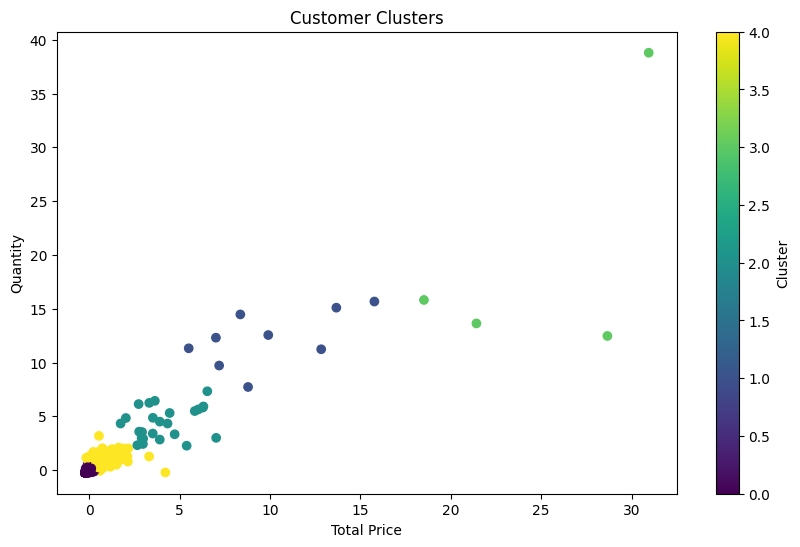

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df=pd.read_csv("/content/OnlineRetail.csv", dtype={"Invoice": str, "StockCode": str}, low_memory=False, encoding='latin-1') # or 'cp1252'

# Data Preparation Steps

# 1. Handling Missing Values
df = df.dropna(subset=['CustomerID'])

# 2. Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 3. Create new columns for Year, Month, Day, and Hour from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

# 4. Remove negative quantities and unit prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# 5. Create a new column for TotalPrice (Quantity * UnitPrice)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Data Transformation Steps

# Aggregate data by CustomerID
customer_df = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Standardize the data
scaler = StandardScaler()
customer_df[['TotalPrice', 'Quantity']] = scaler.fit_transform(customer_df[['TotalPrice', 'Quantity']])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(customer_df[['TotalPrice', 'Quantity']])

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(customer_df['TotalPrice'], customer_df['Quantity'], c=customer_df['Cluster'], cmap='viridis')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.title('Customer Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Save the clustered data to a new Excel file
customer_df.to_excel('customer_clusters.xlsx', index=False)


<ipython-input-21-0d91e92bd653>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


Mean Squared Error: 33265353.97705586
R-squared: 0.6752788520159961


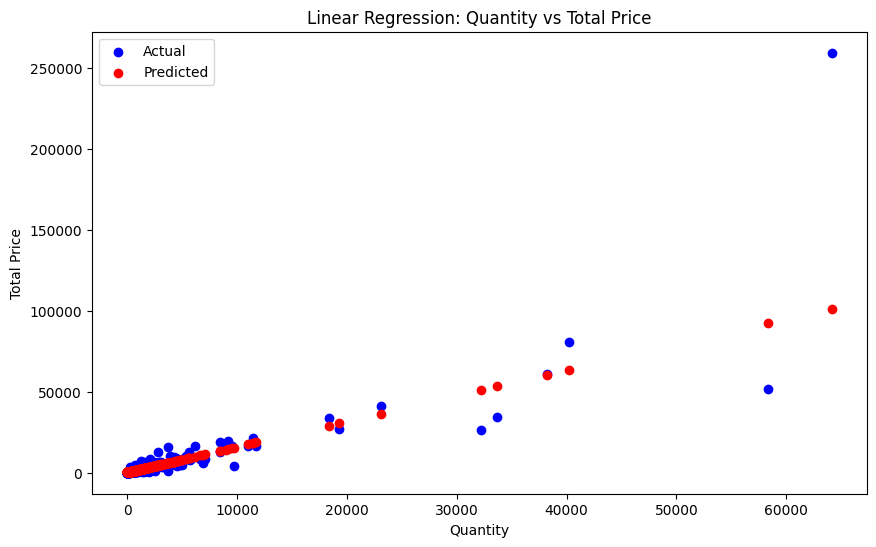

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df=pd.read_csv("/content/OnlineRetail.csv", dtype={"Invoice": str, "StockCode": str}, low_memory=False, encoding='latin-1') # or 'cp1252'

# Data Preparation Steps

# 1. Handling Missing Values
df = df.dropna(subset=['CustomerID'])

# 2. Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 3. Create new columns for Year, Month, Day, and Hour from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

# 4. Remove negative quantities and unit prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# 5. Create a new column for TotalPrice (Quantity * UnitPrice)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Data Transformation Steps

# Aggregate data by CustomerID
customer_df = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Regression Steps

# Define features and target variable
X = customer_df[['Quantity']]
y = customer_df['TotalPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.title('Linear Regression: Quantity vs Total Price')
plt.legend()
plt.show()

# Save the regression results to a new Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('regression_results.xlsx', index=False)

